# Assignment 2a Due

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [3]:
import numpy as np
import math
import scipy as sci
import matplotlib.pyplot as plt

Now we can define our integration algorithms

In [4]:
def midpoint(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    area = dx*math.fsum(f(x0 + (i+0.5)*dx) for i in range (0,n))
    return area

In [5]:
def trap(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    #area = 0.5*dx*math.fsum(2*f(x0 + i*dx) for i in range (1,n))
    #area += 0.5*dx*(f(x0) + f(xn))
    area = dx*math.fsum(0.5*(f(x0 +i*dx) + f(x0 + (i+1)*dx)) for i in range (0,n))
    return area

In [6]:
def simp(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    s_odd = 0
    s_even = 0
    for i in range (1,n,2):
        s_odd += 4*f(x0 + i*dx) 
    for j in range (2,n-1,2):
        s_even += 2*f(x0 + j*dx) 
    area = (dx/3.0)*(f(x0) + s_even + s_odd + f(xn))
    return area


# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

Can check these functions against an actual solution from scipy. When integrating using these methods increasing the number of partitions to a large value will give answers close to the actual solution. If the functions aren't working properly, the approximated answer won't converge upon the real solution.

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

Unsure (I haven't had a physics class in a few years). 

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [10]:
f = lambda x: 2/((2**2+x**2)**(3/2))
x0 = 0
xn = 2
n = 6
dx = float((xn-x0)/n)
integrate q
from scipy import integrate
sci_quad = integrate.quad(f,x0,xn)
print('sci_quad: ', sci_quad )
exact_solution = sci_quad[0]
print("exact solution: ", exact_solution)

sci_quad:  (0.3535533905932738, 3.925231146709438e-15)
exact solution:  0.3535533905932738


In [20]:
print('My trapezoidal approximation: ', trap(f,x0,xn,n))
print('My simpson approxation: ', simp(f,x0,xn,n))

My trapezoidal approximation:  0.35293994641413146
My simpson approxation:  0.3535517906244493


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [21]:
xs = np.linspace(x0,xn,n+1)
ys = 2/((2**2+xs**2)**(3/2))
sci_trap = sci.integrate.trapz(ys,xs,dx)
sci_simp = sci.integrate.simps(ys,xs)
print('sci_trap: ',sci_trap)
print('sci_simp: ',sci_simp)

sci_trap:  0.35293994641413146
sci_simp:  0.35355179062444925


# Question
How do scipy integrals compare to yours? Support your answer. 

In [23]:
print('sci_trap: ', sci_trap, 'my_trap: ',trap(f,x0,xn,n))
print('sci_simp: ',sci_simp, 'my_simp: ',simp(f,x0,xn,n))


sci_trap:  0.35293994641413146 my_trap:  0.35293994641413146
sci_simp:  0.35355179062444925 my_simp:  0.3535517906244493


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [28]:
midpoint_comp = 100*(midpoint(f,x0,xn,n) - exact_solution)/exact_solution
trapezoid_comp = 100*(trap(f,x0,xn,n)-exact_solution)/exact_solution
simp_comp = 100*(simp(f,x0,xn,n)-exact_solution)/exact_solution

print(midpoint_comp)
print(trapezoid_comp)
print(simp_comp)

0.08671529489315273
-0.17350821558038287
-0.00045253952219184745


# Question
Which method provides the best approximation to the exact solution?

Simpson's approximation provides the closest approximation of the three, with the midpoint method being second closest.

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

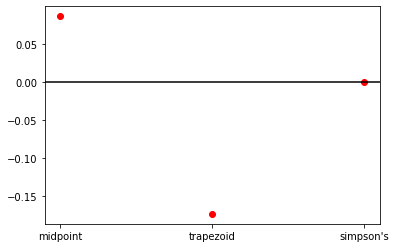

In [41]:
approximations = [midpoint_comp, trapezoid_comp, simp_comp]
methods = ["midpoint","trapezoid",'simpson\'s']
zeroLine = [0,0,0]
plt.plot(methods, approximations, "ro")
plt.axhline(y=0,color='k',linestyle='-')

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [47]:
f = lambda x: math.exp(-x**2)
x0 = -np.inf
xn = np.inf
integrate.quad(f,x0,xn)


(1.7724538509055159, 1.4202636756659625e-08)

# Question
If you square your solution, does the resulting number have any special meaning?

This value squared is equal to pi. This integral is an integral of the Gaussian function.